In [1]:
# Copyright (C) 2016 Quaternion Risk Management Ltd.
# All rights reserved.

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats.kde import gaussian_kde
from npvlib import NpvCube
%matplotlib notebook
from ipywidgets import *
from IPython.display import display
from traitlets import link

/Users/niall/anaconda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
csv_file = '/Users/niall/dev/OpenXVA/Tools/ZoomData/cube_100_250_1000.csv'
npv = NpvCube(csv_file)
    
def on_PlotButton_clicked(b):
    global fig;
    global ax;
    if NewPlot.value == 'Replot':
        plt.cla()
    else:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    trade = npv.trades[TradeDropdown.value]
    fig.canvas.set_window_title(trade + ' Density')
    npv.plot_density(trade, ax, NpvRadio.value)
    plt.show()

<IPython.core.display.Javascript object>


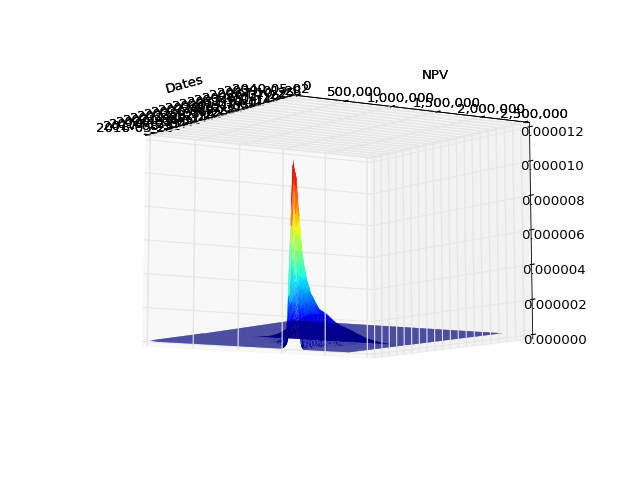

In [3]:
TradeDropdown = Dropdown(
    options=npv.tradedict,
    value=0,
    description='TradeID:',
)
PlotButton = Button(description='Plot')
PlotButton.on_click(on_PlotButton_clicked)
NewPlot = ToggleButtons(description='Mode:', options=['Replot', 'New plot'])
NpvRadio = RadioButtons(description='Exposure:', options=['NPV', 'NPV+', 'NPV-'])
display(TradeDropdown)
display(NewPlot)
display(NpvRadio)
display(PlotButton)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')